In [1]:
# I treated this file as an "exploratory" section on the dataset, just trying to figure it out on how it works and what i can do with it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Settings
df = pd.read_csv("winners_f1_1950_2025_v2.csv")

print(df.head())
df.tail(5)

# Statistical analysis of numerical columns.
df.describe()

# Personal Notes:
# Maximum and minimun laps: 200 / 1 (I'm curious about the last one)

df['time'] = pd.to_timedelta(df['time'], errors='coerce')

df['time'] = df['time'].fillna(pd.Timedelta(seconds=0))

df['time_segundos'] = df['time'].dt.total_seconds()

print(df.isnull().sum())

print(df.info())

         date      continent     grand_prix                       circuit  \
0  1950-05-13         Europe  Great Britain           Silverstone Circuit   
1  1950-05-21         Europe         Monaco             Circuit de Monaco   
2  1950-05-30  North America  United States   Indianapolis Motor Speedway   
3  1950-06-04         Europe    Switzerland            Circuit Bremgarten   
4  1950-06-18         Europe        Belgium  Circuit de Spa Francorchamps   

          winner_name                      team      time   laps  year  
0         Nino Farina                Alfa Romeo  02:13:23   70.0  1950  
1  Juan Manuel Fangio                Alfa Romeo  03:13:18  100.0  1950  
2     Johnnie Parsons  Kurtis Kraft Offenhauser  02:46:55  138.0  1950  
3         Nino Farina                Alfa Romeo  02:02:53   42.0  1950  
4  Juan Manuel Fangio                Alfa Romeo  02:47:26   35.0  1950  
date             0
continent        0
grand_prix       0
circuit          0
winner_name      0
team

In [3]:
# Searching for the races with max and minimum laps:

maior_laps = df.loc[df['laps'].idxmax()]
menor_laps = df.loc[df['laps'].idxmin()]

# Showing the row

print(maior_laps)
print("--------------")
print(menor_laps) # A popular case: The race had just one lap because the rain was too strong. Recent.

date                              1951-05-30
continent                      North America
grand_prix                     United States
circuit          Indianapolis Motor Speedway
winner_name                      Lee Wallard
team                Kurtis Kraft Offenhauser
time                         0 days 03:57:38
laps                                   200.0
year                                    1951
time_segundos                        14258.0
Name: 8, dtype: object
--------------
date                               2021-08-29
continent                              Europe
grand_prix                            Belgium
circuit          Circuit de Spa Francorchamps
winner_name                    Max Verstappen
team                    Red Bull Racing Honda
time                          0 days 00:00:00
laps                                      1.0
year                                     2021
time_segundos                             0.0
Name: 1049, dtype: object


In [4]:
# Most victorious pilot and team:

winner_p = df['winner_name'].value_counts()
print(winner_p.head(1))

winner_t = df['team'].value_counts()
print(winner_t.head(1))

winner_name
Lewis Hamilton    105
Name: count, dtype: int64
team
Ferrari    249
Name: count, dtype: int64


In [5]:
# Grouping wins by driver:

wins_by_driver = df.groupby('winner_name').size().sort_values(ascending=False)
print("Top 10 driver w/ most wins:\n", wins_by_driver.head(10))

# Grouping wins by team:

vitorias_por_equipe = df.groupby('team').size().sort_values(ascending=False)
print("\nTop 10 teams w/ most wins:\n", vitorias_por_equipe.head(10))

Top 10 driver w/ most wins:
 winner_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         65
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Niki Lauda             25
dtype: int64

Top 10 teams w/ most wins:
 team
Ferrari                       249
Mercedes                      121
McLaren Mercedes               85
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
McLaren Ford                   35
Renault                        35
Red Bull Racing Renault        35
Red Bull Racing Honda RBPT     30
dtype: int64


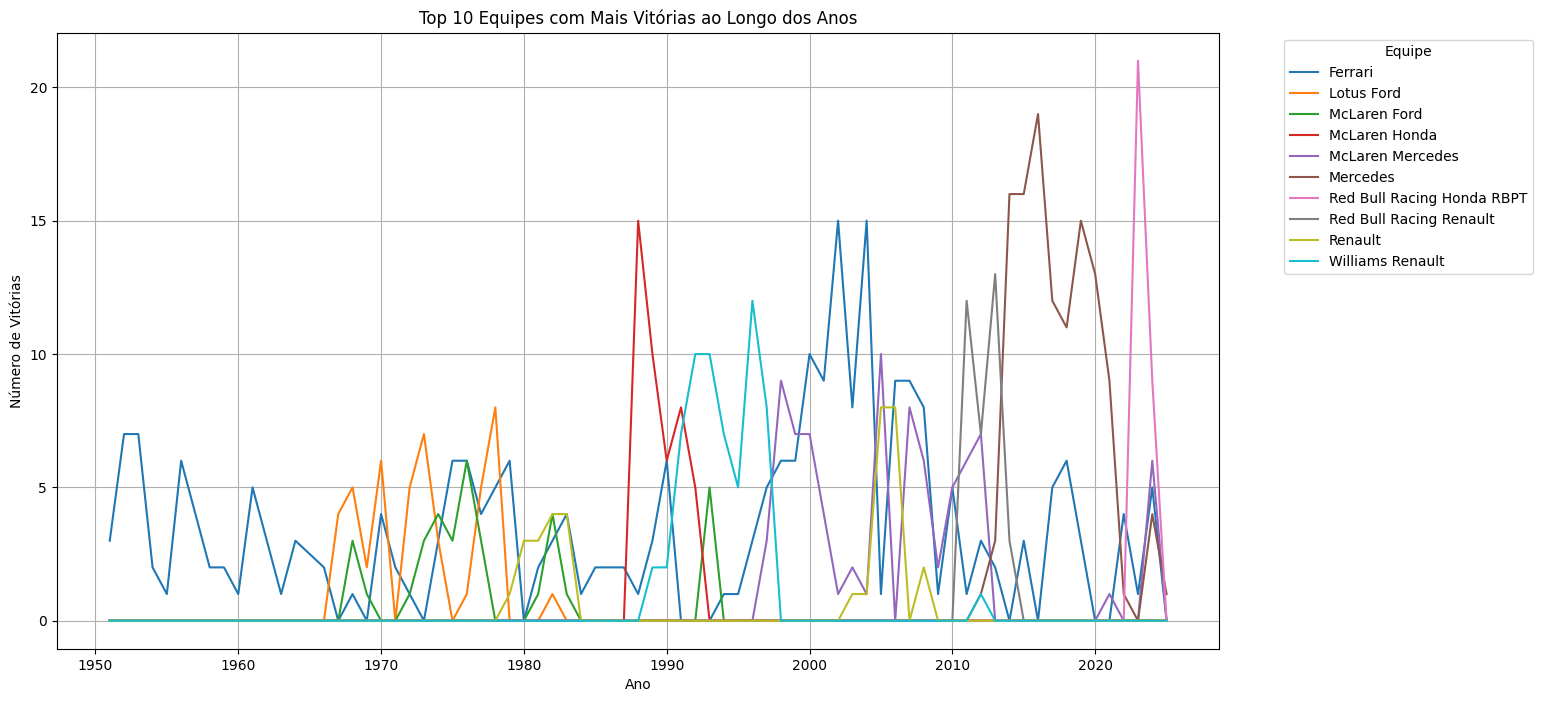

In [6]:
# At this point, i decided to make comparative analysis between teams:

# Setting up top 10s:

top_10_teams_list = df['team'].value_counts().head(10).index.tolist()

df_top_10 = df[df['team'].isin(top_10_teams_list)]

# Create the DataFrame of wins by year, now with only the top 10.
wins_by_year_team = df_top_10.groupby(['year', 'team']).size().unstack(fill_value=0)

# Plot the data
wins_by_year_team.plot(kind='line', figsize=(15, 8))
plt.title('Top 10 Equipes com Mais Vitórias ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Vitórias')
plt.legend(title='Equipe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

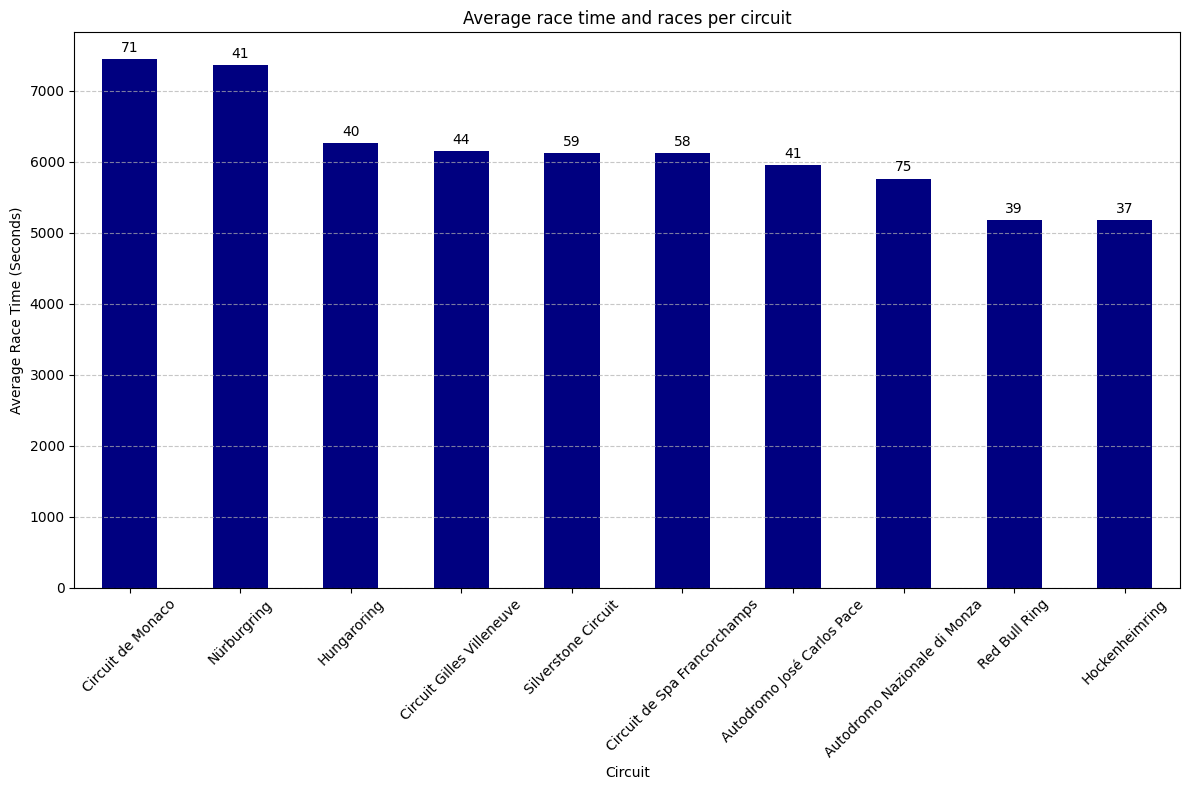

In [7]:
# Average Race Time by Circuit (with Race Count)

circuit_analysis = df.groupby('circuit').agg(
    tempo_medio=('time_segundos', 'mean'),
    num_corridas=('circuit', 'size')
).dropna().sort_values(by='tempo_medio')

# Let´s check only the top 10:

top_10_circuits = circuit_analysis.sort_values(by='num_corridas', ascending=False).head(10)
top_10_circuits = top_10_circuits.sort_values(by='tempo_medio', ascending=False)
# Plot data

plt.figure(figsize=(12, 8))
ax = top_10_circuits['tempo_medio'].plot(kind='bar', color='navy')

plt.title('Average race time and races per circuit')
plt.xlabel('Circuit')
plt.ylabel('Average Race Time (Seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the text labels (number of races) to each bar
for i, v in enumerate(top_10_circuits['num_corridas']):
    ax.text(i, top_10_circuits['tempo_medio'].iloc[i] + 100, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()

# O gráfico mostra em seu eixo X, os 10 circuitos mais rodados, e no eixo Y o tempo médio para os
# vencedores o concluirem. No rotulo (numero acima das barras) o número de corridas 
# em cada um deles

                     circuit       winner_name  vitorias
0                       AVUS       Tony Brooks         1
1    Adelaide Street Circuit       Alain Prost         2
2    Adelaide Street Circuit      Ayrton Senna         2
3    Adelaide Street Circuit        Damon Hill         1
4    Adelaide Street Circuit    Gerhard Berger         2
..                       ...               ...       ...
691       Yas Marina Circuit    Max Verstappen         4
692       Yas Marina Circuit      Nico Rosberg         1
693       Yas Marina Circuit  Sebastian Vettel         3
694       Yas Marina Circuit   Valtteri Bottas         1
695         Zeltweg Airfield   Lorenzo Bandini         1

[696 rows x 3 columns]
                                          circuit            winner_name  vitorias
0                                            AVUS            Tony Brooks         1
1                         Adelaide Street Circuit            Alain Prost         2
2                         Adelaide Street C

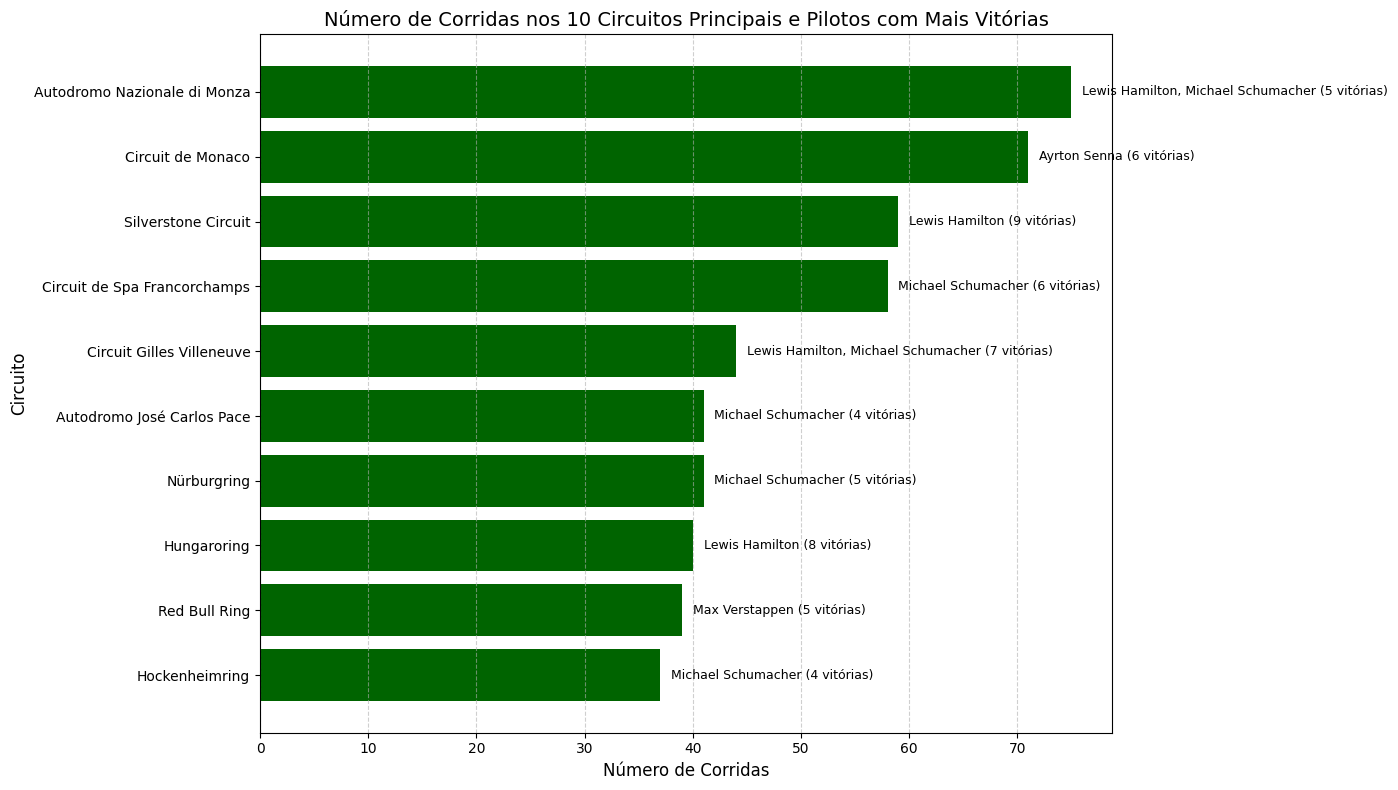

In [8]:
# Circuits with most races and top winers

# Agrupando circuitos e pilotos, para vermos qual piloto mais ganhou em cada circuito.
drivers_wins_per_circuit = df.groupby(['circuit', 'winner_name']).size().reset_index(name='vitorias')
print(drivers_wins_per_circuit)

# Encontrando o top 1 piloto:

# Encontrar o número máximo de vitórias para cada circuito
max_wins_per_circuit = drivers_wins_per_circuit.groupby('circuit')['vitorias'].transform('max')
# Filtrar o DataFrame para incluir apenas as linhas onde o número de vitórias é igual ao máximo
top_winners_per_circuit_with_ties = drivers_wins_per_circuit[drivers_wins_per_circuit['vitorias'] == max_wins_per_circuit]
print(top_winners_per_circuit_with_ties.to_string())

print('------------------------Data Visualization-------------------------------')

#Função para combinar, em uma mesma string, o nome dos top winners em caso de empate
top_winners_combined = top_winners_per_circuit_with_ties.groupby('circuit').agg(
    top_winners=('winner_name', lambda x: ', '.join(x.unique())),
    vitorias_do_piloto=('vitorias', 'first')
).reset_index()

# 3. Unir a análise dos 10 circuitos principais com os dados dos pilotos
final_analysis = pd.merge(top_10_circuits, top_winners_combined, on='circuit', how='inner')

# Ordenar os dados pelo número de corridas para o gráfico
final_plot_data = final_analysis.sort_values(by='num_corridas', ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(14, 8))
bars = plt.barh(final_plot_data['circuit'], final_plot_data['num_corridas'], color='darkgreen')

# Configurar rótulos e título
plt.xlabel('Número de Corridas', fontsize=12)
plt.ylabel('Circuito', fontsize=12)
plt.title('Número de Corridas nos 10 Circuitos Principais e Pilotos com Mais Vitórias', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adicionar os rótulos (pilotos com mais vitórias) no final de cada barra
for index, value in enumerate(final_plot_data['num_corridas']):
    winner_name = final_plot_data['top_winners'].iloc[index]
    wins_count = final_plot_data['vitorias_do_piloto'].iloc[index]
    
    label_text = f'{winner_name} ({wins_count} vitórias)'
    plt.text(value + 1, index, label_text, va='center', fontsize=9)

plt.tight_layout()

plt.show()


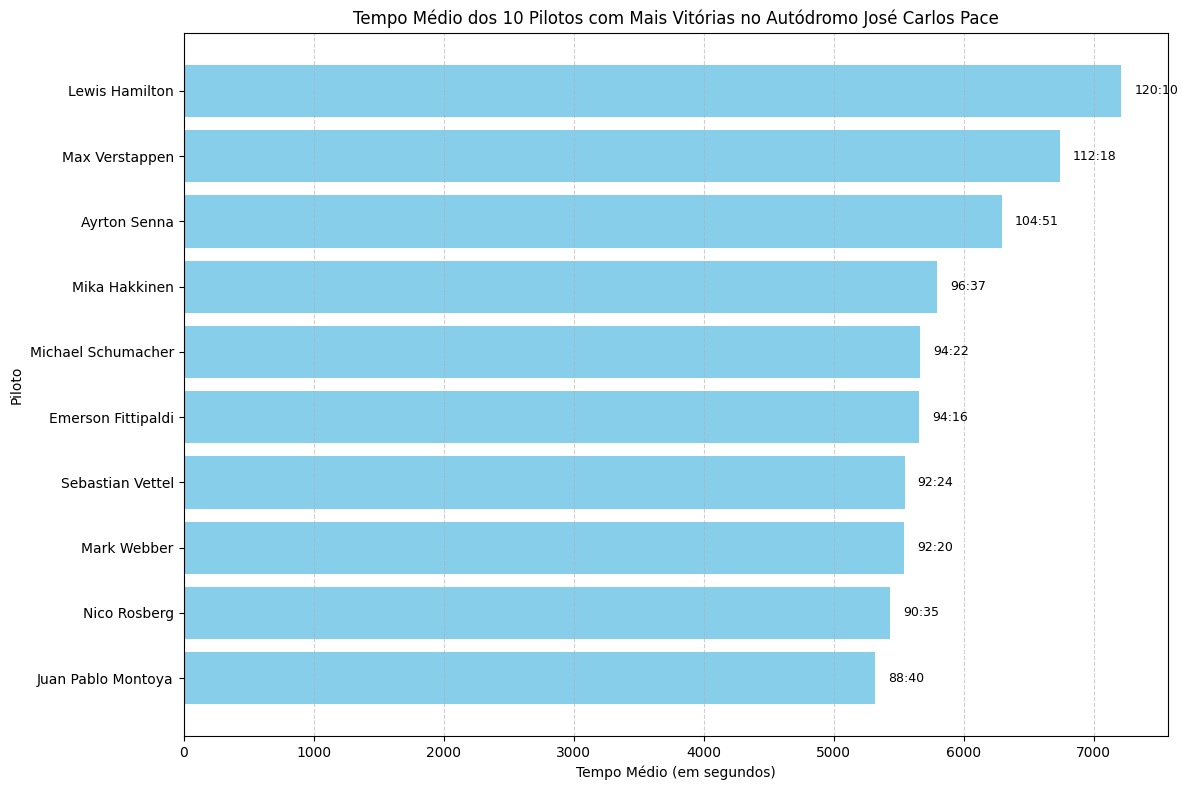

In [9]:
# Análise do circuito de interlagos.

df_interlagos = df[df['circuit'] == 'Autodromo José Carlos Pace'].copy()

df_interlagos.dropna(subset=['time_segundos'], inplace=True)

# 4. Encontrar os 10 pilotos com mais vitórias em Interlagos
top_10_drivers_interlagos = df_interlagos['winner_name'].value_counts().head(10).index.tolist()

# 5. Filtrar o DataFrame para incluir apenas os 10 pilotos principais
df_top_10_drivers = df_interlagos[df_interlagos['winner_name'].isin(top_10_drivers_interlagos)]

# 6. Calcular o tempo médio em segundos para cada um desses pilotos
avg_time_per_driver = df_top_10_drivers.groupby('winner_name')['time_segundos'].mean().reset_index()

# 7. Ordenar os resultados pelo tempo médio
avg_time_per_driver = avg_time_per_driver.sort_values(by='time_segundos')

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
bars = plt.barh(avg_time_per_driver['winner_name'], avg_time_per_driver['time_segundos'], color='skyblue')

# Configurar rótulos e título
plt.xlabel('Tempo Médio (em segundos)')
plt.ylabel('Piloto')
plt.title('Tempo Médio dos 10 Pilotos com Mais Vitórias no Autódromo José Carlos Pace')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adicionar os rótulos de tempo no final de cada barra
for index, value in enumerate(avg_time_per_driver['time_segundos']):
    # Converter segundos para o formato MM:SS
    minutes = int(value // 60)
    seconds = int(value % 60)
    label_text = f'{minutes:02d}:{seconds:02d}'
    
    plt.text(value + 100, index, label_text, va='center', fontsize=9)

plt.tight_layout()

# Salvar o gráfico em um arquivo (opcional)
# plt.savefig('avg_time_interlagos.png')

# Mostrar o gráfico
plt.show()

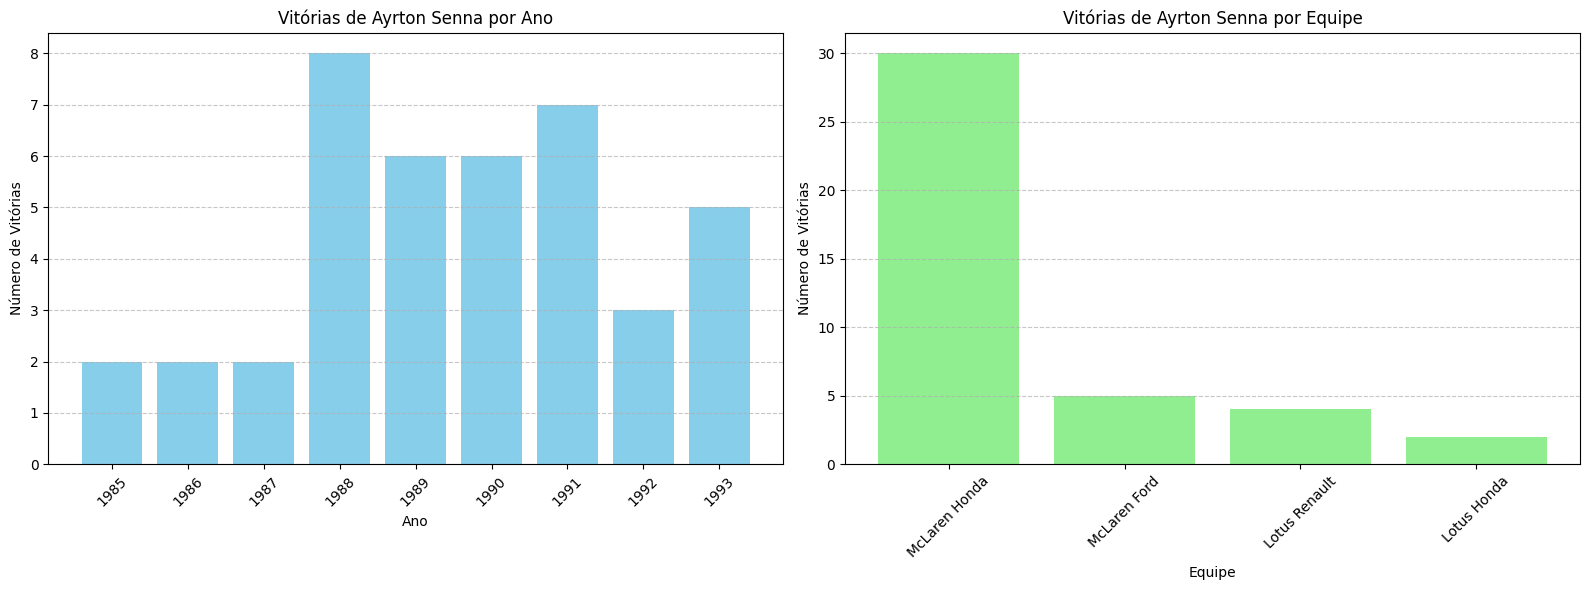

In [10]:
# General Stats - Ayton Senna
# Practicing with individual stats for later comparison

# Filtering the DataFrame to get only Ayrton Senna's data.
df_senna = df[df['winner_name'] == 'Ayrton Senna'].copy()

# Step 1: Wins by year
senna_wins_by_year = df_senna.groupby('year').size()

# Step 2: Wins by team
senna_wins_by_team = df_senna.groupby('team').size().sort_values(ascending=False)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Bar chart of wins by year
ax1.bar(senna_wins_by_year.index, senna_wins_by_year.values, color='skyblue')
ax1.set_title('Vitórias de Ayrton Senna por Ano')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de Vitórias')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(senna_wins_by_year.index)
ax1.tick_params(axis='x', rotation=45)

# Subplot 2: Bar chart of wins by team
ax2.bar(senna_wins_by_team.index, senna_wins_by_team.values, color='lightgreen')
ax2.set_title('Vitórias de Ayrton Senna por Equipe')
ax2.set_xlabel('Equipe')
ax2.set_ylabel('Número de Vitórias')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# From here, I outlined what I truly wanted to analyze with the dataset.
# Using the data we have, I decided to create a metric to analyze who the best individual Formula 1 driver was.
# So I started doing some comparative analyses of the drivers.
# **Observations: The dataset's limitation was clear; there are countless variables and characteristics not covered in it.
# However, for my objective, it served its purpose well for now.**

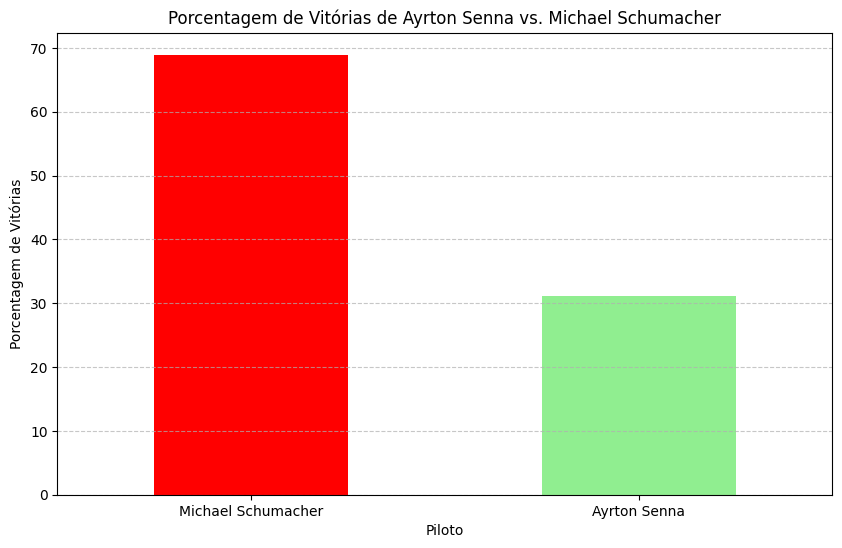

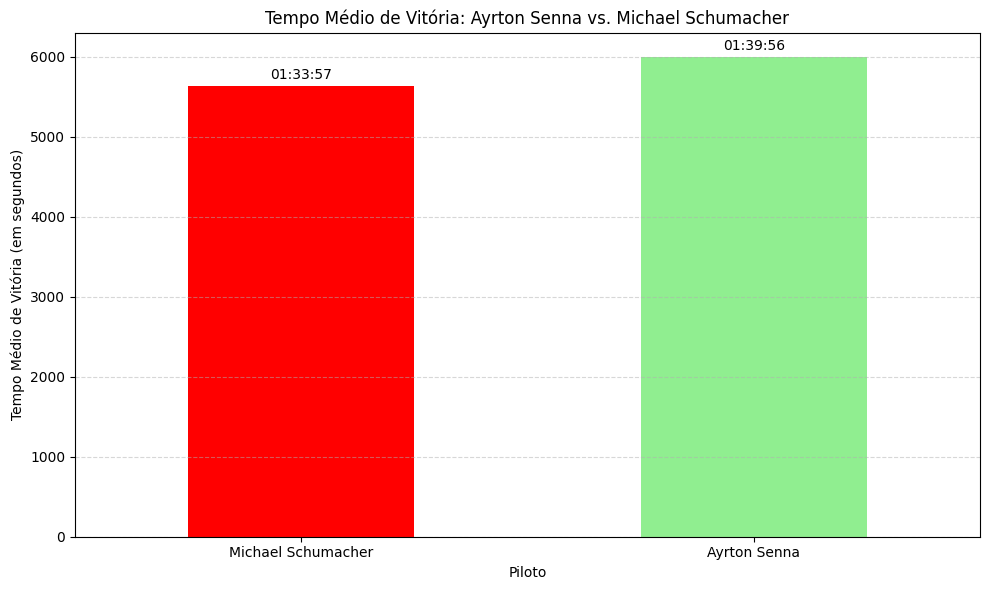

In [12]:
# Filtering the DataFrame to get only Senna and Schumacher's data. (Practice)
df_senna_vs_mich = df[df['winner_name'].isin(['Ayrton Senna', 'Michael Schumacher'])].copy()

# Who has a better % of wins

# Count the total wins of each driver.
total_wins_by_driver = df_senna_vs_mich['winner_name'].value_counts()

# Calculate the percentage of wins for each driver.
total_wins_sum = total_wins_by_driver.sum()
win_percentage = (total_wins_by_driver / total_wins_sum) * 100

# Ploting the data
plt.figure(figsize=(10, 6))
win_percentage.plot(kind='bar', color=['red', 'lightgreen'])

plt.title('Porcentagem de Vitórias de Ayrton Senna vs. Michael Schumacher')
plt.xlabel('Piloto')
plt.ylabel('Porcentagem de Vitórias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#---------------------------------------------------------------------------------------------------
# Who was faster in victories?

# Group by driver and calculate the average victory time.
avg_win_time = df_senna_vs_mich.groupby('winner_name')['time_segundos'].mean().sort_values()

# Ploting the data
plt.figure(figsize=(10, 6))
ax = avg_win_time.plot(kind='bar', color=['red', 'lightgreen'])

# Add formatted time labels for each bar.
for index, value in enumerate(avg_win_time):
    # Convert seconds to the HH:MM:SS format.
    minutes, seconds = divmod(value, 60)
    hours, minutes = divmod(minutes, 60)
    time_str = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    ax.text(index, value + 50, time_str, ha='center', va='bottom', fontsize=10)

plt.title('Tempo Médio de Vitória: Ayrton Senna vs. Michael Schumacher')
plt.xlabel('Piloto')
plt.ylabel('Tempo Médio de Vitória (em segundos)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()